Linear regression is a type of supervised machine learning algorithm that computes the linear relationship between the dependent variable and one or more independent features by fitting a linear equation to observed data.

Simple LR :  
y= β0 + β1X  


Multiple LR :  
y=β0+β1X1+β2X2+………βnXn

To achieve the best-fit regression line, the model aims to predict the target value y such that the error difference between the predicted value y and the true value Y is minimum. So, it is very important to update the θ1 and θ2 values, to reach the best value that minimizes the error 

minimize (1/n) * ∑i=1n(yi−Y)**2
ie Thea mean squared error

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.axes as ax
from matplotlib.animation import FuncAnimation

In [13]:
url = 'https://media.geeksforgeeks.org/wp-content/uploads/20240320114716/data_for_lr.csv'
data = pd.read_csv(url)
data

# Drop the missing values
data = data.dropna()

# training dataset and labels
train_input = np.array(data.x[0:500]).reshape(500, 1)
train_output = np.array(data.y[0:500]).reshape(500, 1)

# valid dataset and labels
test_input = np.array(data.x[500:700]).reshape(199, 1)
test_output = np.array(data.y[500:700]).reshape(199, 1)


In [6]:
# data = pd.read_csv("salary_data.csv")
# data

# # Drop the missing values
# data = data.dropna()

# # training dataset and labels
# train_input = np.array(data.YearsExperience[0:25]).reshape(25, 1)
# train_output = np.array(data.Salary[0:25]).reshape(25, 1)

# # valid dataset and labels
# test_input = np.array(data.YearsExperience[25:]).reshape(5, 1)
# test_output = np.array(data.Salary[25:]).reshape(5, 1)


In [14]:
class LinearRegression: 
    def __init__(self): 
        self.parameters = {} 

    def forward_propagation(self, train_input): 
        m = self.parameters['m'] 
        c = self.parameters['c'] 
        predictions = np.multiply(m, train_input) + c 
        return predictions 

    def cost_function(self, predictions, train_output): 
        cost = np.mean((train_output - predictions) ** 2) 
        return cost 

    def backward_propagation(self, train_input, train_output, predictions): 
        derivatives = {} 
        df = (predictions-train_output) 
        # dm= 2/n * mean of (predictions-actual) * input 
        dm = 2 * np.mean(np.multiply(train_input, df)) 
        # dc = 2/n * mean of (predictions-actual) 
        dc = 2 * np.mean(df) 
        derivatives['dm'] = dm 
        derivatives['dc'] = dc 
        return derivatives 

    def update_parameters(self, derivatives, learning_rate): 
        self.parameters['m'] = self.parameters['m'] - learning_rate * derivatives['dm'] 
        self.parameters['c'] = self.parameters['c'] - learning_rate * derivatives['dc'] 

    def train(self, train_input, train_output, learning_rate, iters): 
        # Initialize random parameters 
        self.parameters['m'] = np.random.uniform(0, 1) * -1
        self.parameters['c'] = np.random.uniform(0, 1) * -1

        # Initialize loss 
        self.loss = [] 

        # Initialize figure and axis for animation 
        fig, ax = plt.subplots() 
        x_vals = np.linspace(min(train_input), max(train_input), 100) 
        line, = ax.plot(x_vals, self.parameters['m'] * x_vals +
                        self.parameters['c'], color='red', label='Regression Line') 
        ax.scatter(train_input, train_output, marker='o', 
                color='green', label='Training Data') 

        # Set y-axis limits to exclude negative values 
        ax.set_ylim(0, max(train_output) + 1) 

        def update(frame): 
            # Forward propagation 
            predictions = self.forward_propagation(train_input) 

            # Cost function 
            cost = self.cost_function(predictions, train_output) 

            # Back propagation 
            derivatives = self.backward_propagation( 
                train_input, train_output, predictions) 

            # Update parameters 
            self.update_parameters(derivatives, learning_rate) 

            # Update the regression line 
            line.set_ydata(self.parameters['m'] 
                        * x_vals + self.parameters['c']) 

            # Append loss and print 
            self.loss.append(cost) 
            print("Iteration = {}, Loss = {}".format(frame + 1, cost)) 

            return line, 
        # Create animation 
        ani = FuncAnimation(fig, update, frames=iters, interval=200, blit=True) 

        # Save the animation as a video file (e.g., MP4) 
        ani.save('linear_regression_A.gif', writer='ffmpeg') 

        plt.xlabel('Input') 
        plt.ylabel('Output') 
        plt.title('Linear Regression') 
        plt.legend() 
        plt.show() 

        return self.parameters, self.loss 


MovieWriter ffmpeg unavailable; using Pillow instead.


Iteration = 1, Loss = 7219.382675633598
Iteration = 1, Loss = 876.9781062125878
Iteration = 1, Loss = 112.64932470581081
Iteration = 1, Loss = 20.53937996892078
Iteration = 2, Loss = 9.439120595501423
Iteration = 3, Loss = 8.10140991044781
Iteration = 4, Loss = 7.940192585750241
Iteration = 5, Loss = 7.920755515227041
Iteration = 6, Loss = 7.918404509148015
Iteration = 7, Loss = 7.918112560645601
Iteration = 8, Loss = 7.9180687518583
Iteration = 9, Loss = 7.918054847476096
Iteration = 10, Loss = 7.918044547769076
Iteration = 11, Loss = 7.918034683333479
Iteration = 12, Loss = 7.91802487222157
Iteration = 13, Loss = 7.918015068404407
Iteration = 14, Loss = 7.918005266334918
Iteration = 15, Loss = 7.917995465344526
Iteration = 16, Loss = 7.917985665352575
Iteration = 17, Loss = 7.917975866349256
Iteration = 18, Loss = 7.917966068333304
Iteration = 19, Loss = 7.9179562713044715
Iteration = 20, Loss = 7.917946475262652


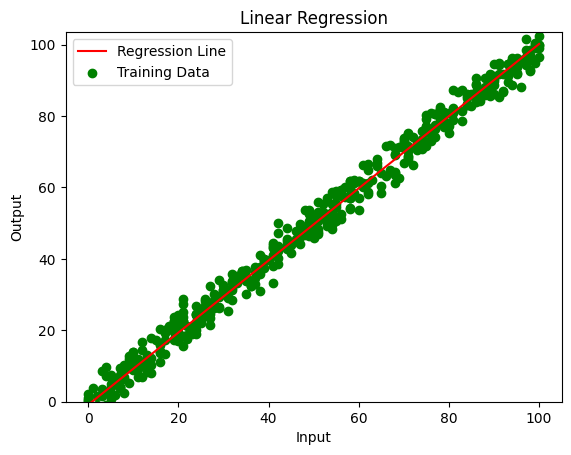

In [17]:
#Example usage
linear_reg = LinearRegression()
parameters, loss = linear_reg.train(train_input, train_output, 0.0001, 20)
